In [31]:
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image
import PIL
import cv2
from datasets import Dataset, Image, load_dataset, Features, Array3D, ClassLabel
import matplotlib.pyplot as plt

In [132]:
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

def create_dataset(images, labels):
    dataset = Dataset.from_dict({"image": images,
                                "label": labels})
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("label", Image())
    return dataset

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.7])
    image_alpha = np.dstack((mask, np.zeros((224, 224)) + 0.5)) * color
    print(image_alpha.shape)
    ax.imshow(image_alpha)

In [14]:
train_filelist_xray = sorted(glob.glob('datasets/QaTa-COV19/QaTa-COV19-v2/Train Set/Images/*.png'), key=numericalSort)
x_train = np.array([np.array(PIL.Image.open(file_xray).convert("RGB")) for file_xray in train_filelist_xray[:100]])

masks = sorted(glob.glob('datasets/QaTa-COV19/QaTa-COV19-v2/Train Set/Ground-truths/*.png'), key=numericalSort)
y_train = np.array([np.array(PIL.Image.open(m).convert("RGB")) for m in masks[:100]])

In [15]:
x_train.shape, y_train.shape

((100, 224, 224, 3), (100, 224, 224, 3))

In [25]:
dataset = create_dataset(x_train, y_train)

/opt/conda/lib/python3.11/site-packages/datasets/features/image.py:332: UserWarning: Downcasting array dtype int64 to uint8 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")


In [26]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 100
})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 4)


(-0.5, 223.5, 223.5, -0.5)

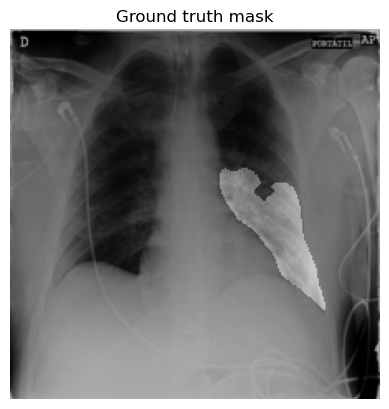

In [154]:
image = dataset[74]["image"]

fig, axes = plt.subplots()
axes.imshow(np.array(image))

ground_truth_seg = np.array(dataset[74]["label"])
show_mask(ground_truth_seg, axes, True)
axes.title.set_text(f"Ground truth mask")
axes.axis("off")